# Credit Card Fraud Detection

In [ ]:
COLAB = True

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
if COLAB:
    id_ = "1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F"
    aux = "'https://docs.google.com/uc?export=download&id={}&confirm=t'".format(id_)
    !wget $aux -O ./creditcard.csv.zip
    !unzip -qq ./creditcard.csv.zip

--2023-10-19 15:21:46--  https://docs.google.com/uc?export=download&id=1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F&confirm=t
Resolving docs.google.com (docs.google.com)... 142.250.98.100, 142.250.98.113, 142.250.98.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8hku8lp16c7ch0pifqvedtlcp91iib26/1697728875000/03894129457800149408/*/1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F?e=download&uuid=1e23738a-f6a2-4013-afac-359f8ccd0600 [following]
--2023-10-19 15:21:46--  https://doc-0o-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8hku8lp16c7ch0pifqvedtlcp91iib26/1697728875000/03894129457800149408/*/1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F?e=download&uuid=1e23738a-f6a2-4013-afac-359f8ccd0600
Resolving doc-0o-0c-docs.googleusercontent.com (doc-0o-0c-docs.googleusercontent.com)... 74.125.196.132, 

In [ ]:
!ls -la

total 144112
drwxr-xr-x 1 root root      4096 Oct 19 15:21 .
drwxr-xr-x 1 root root      4096 Oct 19 15:20 ..
drwxr-xr-x 4 root root      4096 Oct 17 13:24 .config
-rwxr-xr-x 1 root root 102634230 Nov 11  2020 creditcard.csv
-rw-r--r-- 1 root root  44909937 Feb 17  2023 creditcard.csv.zip
drwxrwxr-x 2 root root      4096 Feb 17  2023 __MACOSX
drwxr-xr-x 1 root root      4096 Oct 17 13:25 sample_data


In [ ]:
# here the import csv file as a pandas dataframe
df = pd.read_csv("./creditcard.csv")

In [ ]:
pd.options.display.max_columns = None
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [ ]:
df["Time"].min(), df["Time"].max()

(0.0, 172792.0)

In [ ]:
172792.0 / (60*60*24) # número de segundos en un día

1.9999074074074075

**Dataset description**

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
print("df dimensions: {} rows by {} columns".format(df.shape[0], df.shape[1]))

df dimensions: 284807 rows by 31 columns


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
y = df['Class'].values
y.shape

(284807,)

In [ ]:
df['Time'].max() / 3600

47.99777777777778

In [ ]:
# now we drop the target variable from the data set
#df.drop(['Class', 'Time', 'Amount'],axis=1,inplace=True)
df.drop(['Class', 'Time'],axis=1,inplace=True)
#df.drop('Class',axis=1,inplace=True)
df.shape

(284807, 29)

In [ ]:
def show_counts(y):
    uns, counts = np.unique(y, return_counts=True)
    for u,c in zip(uns,counts):
        print("y={}: {} times".format(u,c))

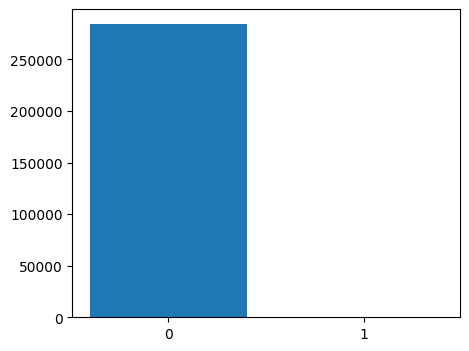

y=0: 284315 times
y=1: 492 times


In [ ]:
#distribution of the target variable

plt.figure(figsize=(5,4))
uns,counts = np.unique(y, return_counts=True)
plt.bar(uns,counts)
plt.xticks([0,1])
plt.show()

show_counts(y)

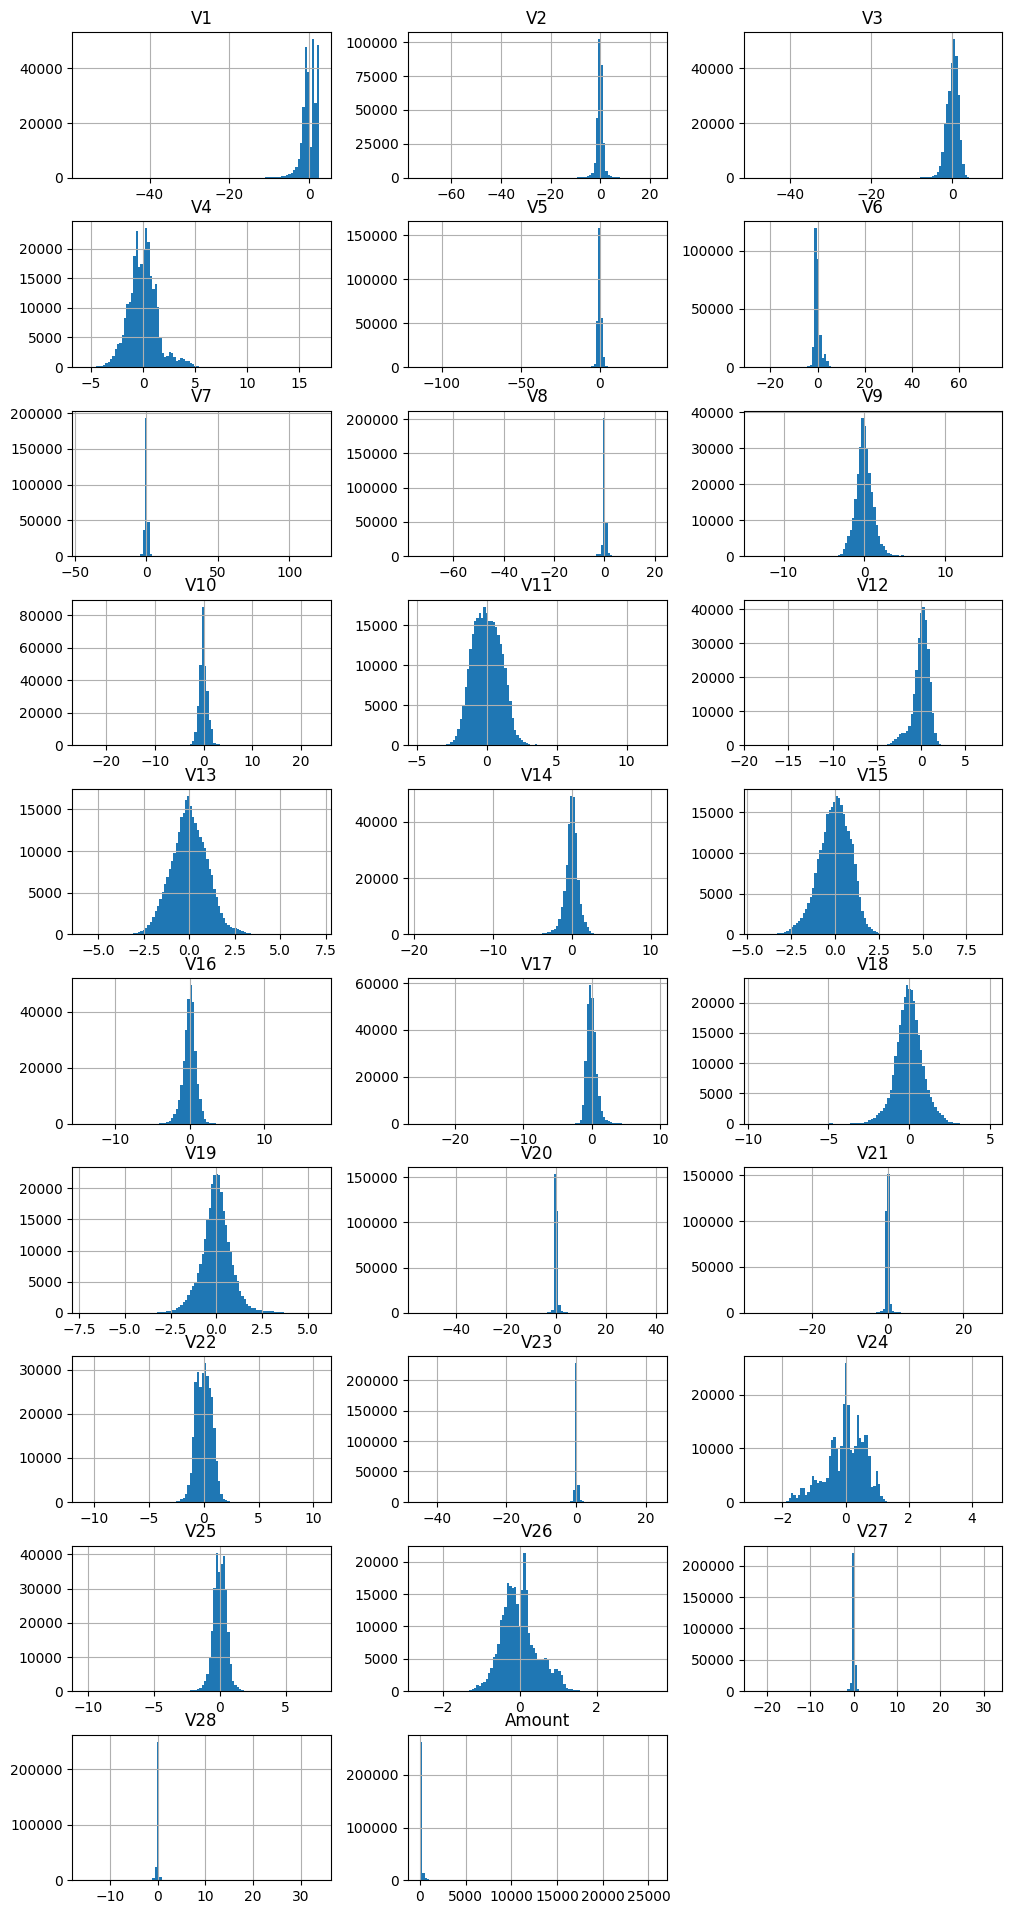

In [ ]:
df.hist(figsize=(12,24), bins=100, layout=(-1,3));

In [ ]:
df2 = df.copy()
df2["class"] = y
df2.sort_values("Amount", ascending=False)[["Amount", "class"]].head(50)

,Amount,class
274771,25691.16,0
58465,19656.53,0
151296,18910.00,0
46841,12910.93,0
54018,11898.09,0
169457,11789.84,0
284249,10199.44,0
227921,10000.00,0
74699,8790.26,0
245474,8787.00,0


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [ ]:
show_counts(y[df.Amount >= 50])

y=0: 94916 times
y=1: 187 times


In [ ]:
y[df.Amount >= 50].mean()

0.0019662891812035374

In [ ]:
y[df.Amount >= 500].mean()

0.003687315634218289

In [ ]:
y[df.Amount >= 1000].mean()

0.002932551319648094

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,7.092545e-13,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
attribute_names = list(df.columns)
print(attribute_names)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


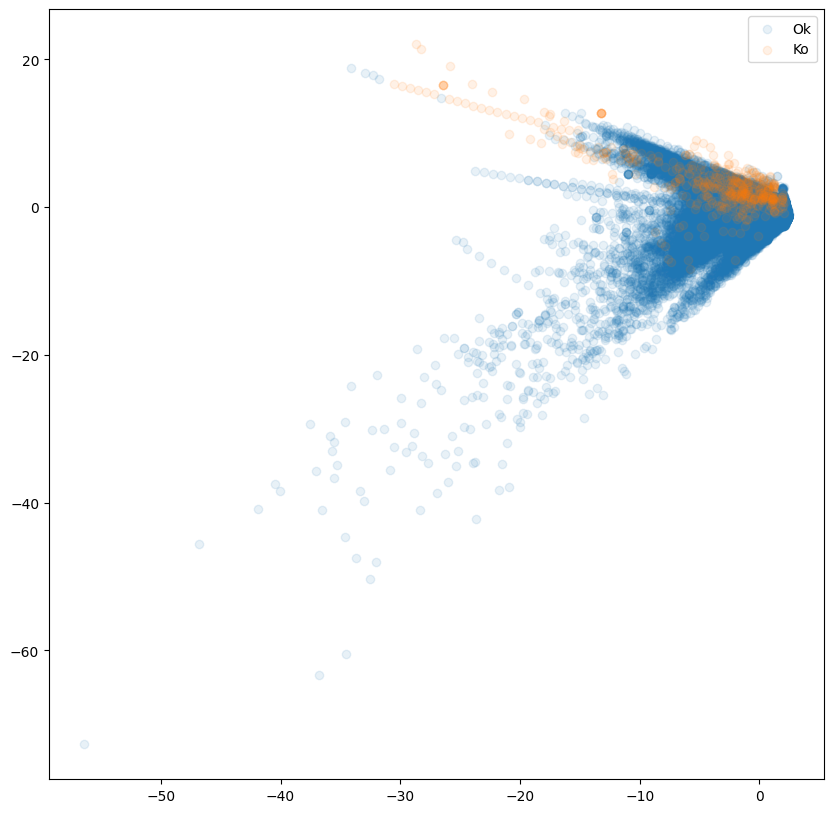

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df[y==0]["V1"], df[y==0]["V2"], alpha=0.1, label="Ok")
plt.scatter(df[y==1]["V1"], df[y==1]["V2"], alpha=0.1, label="Ko")
plt.legend();

In [ ]:
df["Amount"] = df["Amount"] / 125

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,0.706797
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.000961
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.044800
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.176000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.617320
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,205.529280


In [ ]:
from sklearn.model_selection import train_test_split

df_tr, df_te, y_tr, y_te = train_test_split(df, y, test_size=0.3, random_state=2, stratify=y)

In [ ]:
y_tr.mean(), y_te.mean()

(0.0017254870488152324, 0.0017321489179921118)

In [ ]:
df_tr.shape

(199364, 29)

In [ ]:
# preparo conjunto de training y de validación
df_tr = df_tr[y_tr==0] # me quedo solo con los ejemplos ok
df_tr, df_val = train_test_split(df_tr, test_size=0.3, random_state=1) # el 30% lo llevo a validación

In [ ]:
df_tr.shape, df_val.shape

((139314, 29), (59706, 29))

# Detección de anomalías con distancia de Mahalanobis

Esto es equivalente a realizar un modelo estadístico donde se ajusta una sola gaussiana a los datos.

In [ ]:
# Por distancia de Mahalanobis:

from sklearn.covariance import MinCovDet

cov = MinCovDet().fit(df_tr.sample(10000)) # matriz de covarianza

dists_train = cov.mahalanobis(df_tr)
th = max(dists_train)

alarmas_test = cov.mahalanobis(df_te) > th

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-258.838697548667483 > -279.830126906761279). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-250.021346998535307 > -251.841027728576876). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-211.680619195610859 > -305.832584592789544). You may want to try with a higher value of support_fraction (current value: 0.502).
  warnings.warn(
/usr/local

In [ ]:
sum(alarmas_test)

0

In [ ]:
dists_test = cov.mahalanobis(df_te)
dists_test

array([1.38125821e+05, 3.87600900e+04, 4.21767834e+08, ...,
       2.59113903e+01, 1.41728338e+01, 1.06197327e+01])

In [ ]:
results_te = pd.DataFrame({"distM":dists_test, "clase":y_te})
results_te.sort_values("distM", ascending=False)[:50]

,distM,clase
46402,4.298141e+12,0
20390,1.714855e+12,0
7136,1.446057e+12,0
9513,1.445130e+12,0
17725,1.444898e+12,0
33112,1.443510e+12,0
30746,1.193238e+12,0
54680,1.188440e+12,0
37738,1.188342e+12,0
30856,9.646438e+11,0


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpt, tpr, thresholds = roc_curve(y_true=y_te, y_score=dists_test, pos_label=1)

In [ ]:
y_te

array([0, 0, 0, ..., 0, 0, 0])

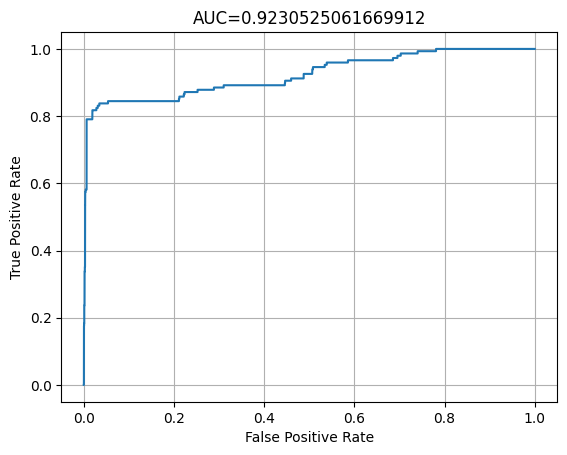

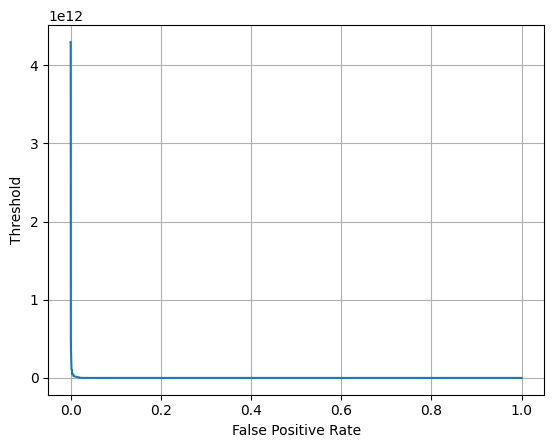

In [ ]:
plt.plot(fpt, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC={}".format(roc_auc_score(y_true=y_te, y_score=dists_test)))
plt.grid()
#plt.xlim([0.0,0.01])
plt.show()
plt.plot(fpt, thresholds)
plt.xlabel("False Positive Rate")
plt.ylabel("Threshold")
#plt.xlim([0.0,0.01])
#plt.ylim([0,10])
plt.grid();

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_te, dists_test, pos_label=1)

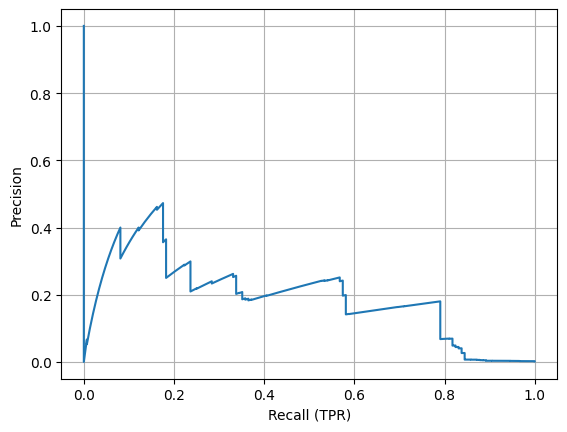

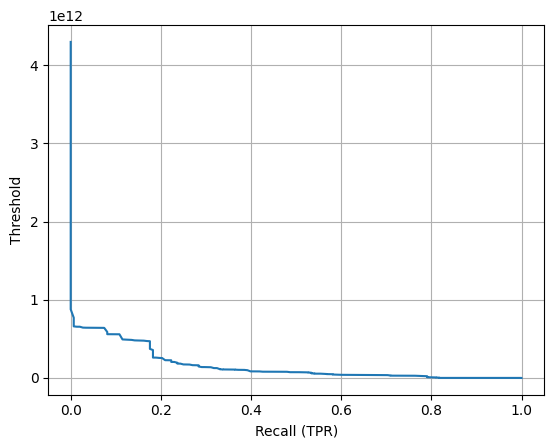

In [ ]:
plt.plot(recall, precision)
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.grid()
#plt.xlim([0.01,0.1])
plt.show()
plt.plot(recall[1:], thresholds)
plt.xlabel("Recall (TPR)")
plt.ylabel("Threshold")
#plt.xlim([0.01,0.1])
#plt.ylim([0,10])
plt.grid();

# Detección de anomalías con modelo estadístico de Mezcla de Gaussianas

In [ ]:
# Por mezcla de Gaussianas:

from sklearn import mixture
# n_components: número de Gaussianas
# n_init: número de intentos (condiciones iniciales aleatorias)

clf = mixture.GaussianMixture(n_components=5, n_init=10)
df_tr_subconjunto = df_tr.sample(10000)
clf.fit(df_tr_subconjunto)

GaussianMixture(n_components=5, n_init=10)

In [ ]:
scores_test = -clf.score_samples(df_te) # score_samples es el logaritmo de la probabilidad de cada punto, según el modelo estadístico
scores_test

In [ ]:
results_te = pd.DataFrame({"dist_mezcla":scores_test, "clase":y_te})
results_te.sort_values("dist_mezcla", ascending=False)[:50]

,dist_mezcla,clase
69554,1.909493e+07,1
72754,1.908874e+07,1
84304,1.908874e+07,1
80444,1.908455e+07,1
20582,1.907794e+07,1
49313,1.907765e+07,1
77734,1.907098e+07,1
58324,1.906979e+07,1
18080,1.666018e+07,1
46886,1.665846e+07,1


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpt, tpr, thresholds = roc_curve(y_true=y_te, y_score=scores_test, pos_label=1)

In [ ]:
y_te

array([0, 0, 0, ..., 0, 0, 0])

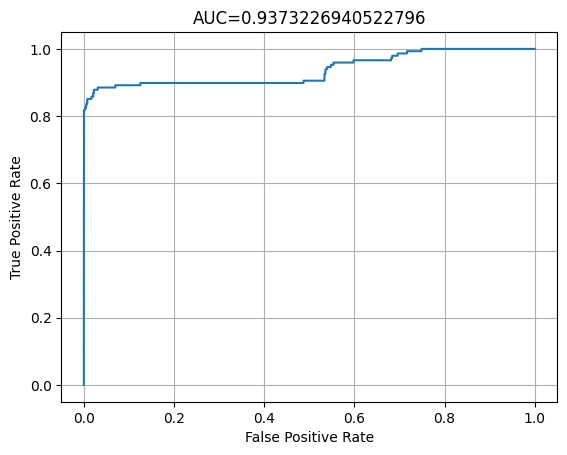

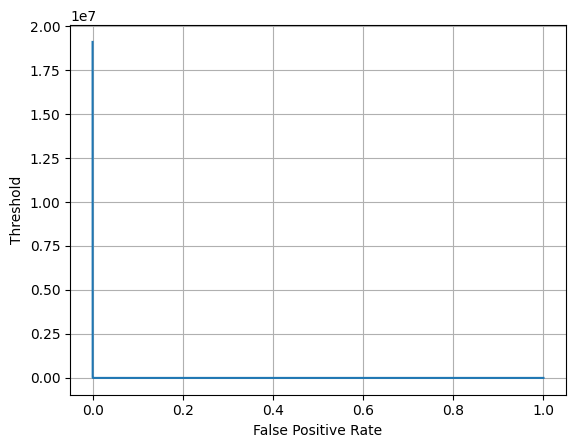

In [ ]:
plt.plot(fpt, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC={}".format(roc_auc_score(y_true=y_te, y_score=scores_test)))
plt.grid()
#plt.xlim([0.0,0.01])
plt.show()
plt.plot(fpt, thresholds)
plt.xlabel("False Positive Rate")
plt.ylabel("Threshold")
#plt.xlim([0.0,0.01])
#plt.ylim([0,10])
plt.grid();

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_te, scores_test, pos_label=1)

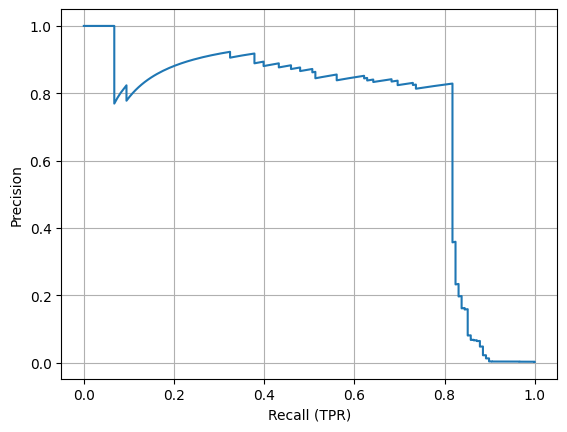

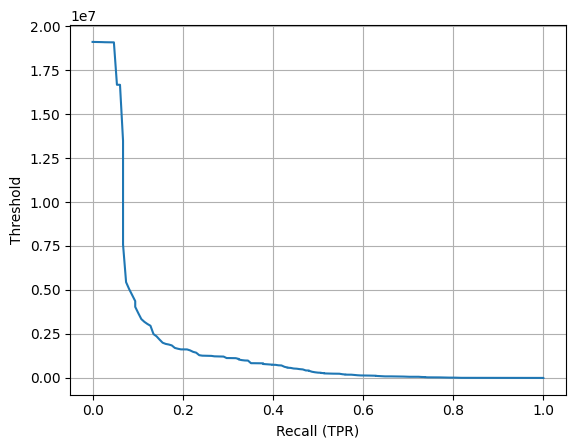

In [ ]:
plt.plot(recall, precision)
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.grid()
#plt.xlim([0.01,0.1])
plt.show()
plt.plot(recall[1:], thresholds)
plt.xlabel("Recall (TPR)")
plt.ylabel("Threshold")
#plt.xlim([0.01,0.1])
#plt.ylim([0,10])
plt.grid();